<H1>確率分布</H1>
これは次の書籍を参考にしています：<UL>
  <LI>平岡、堀 (2009)『プログラミングのための確率統計』オーム社
  <LI>杉山 (2015)『機械学習のための確率と統計』講談社
</UL>
<h2>主要な確率分布</h2>
データは連続的な値を取る連続型分布と、とびとびの値をとる離散型確率変数に対応した確率分布の離散型分布とに分類されます。<BR>
確率分布の性質（グラフの形など）は「パラメタ」によって変わります。 そして関数率分布それぞれ、異なるパラメタを取ります。 以下ではいろいろな形状の確率分布を紹介しますが、どのような確率分布がどのようなパラメタを取るかにも注意してみましょう。

<h2>離散型確率分布</h2>
離散型確率分布は、確率変数がとびとびの値を撮る場合に、それぞれの値をとる確率の分布です。離散型確率変数$X$が実現値$x$を確率$P(X=x)$が何らかの関数$f(x)$で定義されるとき、その関数を<B>確率質量関数(probability mass function)</B>と呼びます（前回の講義参照)。
$$ P(X=x) = f(x)$$
この項では主要な離散型確率分布とその確率質量関数について紹介します。

<h3>(離散)一様分布 (discrete uniform distribution)</h3>
$N$個の事象${1, \ldots, N}$が等確率で起こる状況に対する確率分布で、$U\{1,\ldots,N\}$と表します。
さいころを振ったときの出目の状況に対応する確率分布がこれで、さいころの場合は6通りの事象がありますので、$U\{1,2,3,4,5,6\}$と表されることになります。
<P>
 離散一様分布$U\{1,\ldots,N\}$の確率質量関数は $f(x)=\frac{1}{N}　　( x=1,\ldots,N )$で与えられます。
<P>
離散一様分布$U\{1,\ldots,N\}$に従う確率変数$X$の期待値と分散は、和の公式$\sum_{x=1}^{N}x = \frac{N(N+1)}{2}$ , $\sum_{x=1}^{N}x^2 = \frac{N(N+1)(2N+1)}{6}$ 
により、
$$ E(X)=\frac{N+1}{2}, \ \ \ \ \ V(X)=\frac{N^2 - 1}{12}$$
となります。

<h4>演習問題1-0. </h4>
「$ E(X)=\frac{N+1}{2}, \ \ \ \ \ V(X)=\frac{N^2 - 1}{12}$」となることを証明せよ。

答:

<h4>演習問題1-1. </h4>
6面体のさいころを振った時の出目の期待値と分散、および20面体のさいころを振った時の出目の期待値と分散を答えよ。


In [11]:
# 計算用


<h3>二項分布(binomial disctribution)</h3>
成功する確率が$p$、失敗する確率が$q (=1-p)$の実験を、同じ条件で独立に繰り返すことを<B>ベルヌーイ試行(Bernoulli trial)</B>とよび、
表が出る確率が$p$のコインを何度も投げる実験がベルヌーイ試行に対応します。
<BR>
二項分布は$B(n, p)$ で表され、$n$回のベルヌーイ試行を行った時に試行が$x$回成功する確率の分布です。コインの例で言えば、
表が出る確率が$p$のコインを$n$ 枚投げ、そのうち$x$枚が表になる確率に対応します。
<BR>
$n$回の試行のうち、ちょうど$x$回成功する確率は$p^x$であり、ちょうど$n-x$回失敗する確率は$q^{n-x}$であり、また$n$回の試行中に$x$回の成功と$n-x$回の失敗の組み合わせは${}_nC_x = \frac{n!}{x!(n-x)!}$通りあるので確率質量関数は(注: $n!$は$n$の階乗で、$n!=n\times(n-1)\times\cdots\times2\times1$ ($n=0, 1, \ldots))$、
$$f(x) = {}_nC_x p^x(1-p)^{n-x} 　　(x=0,1,…, n)$$


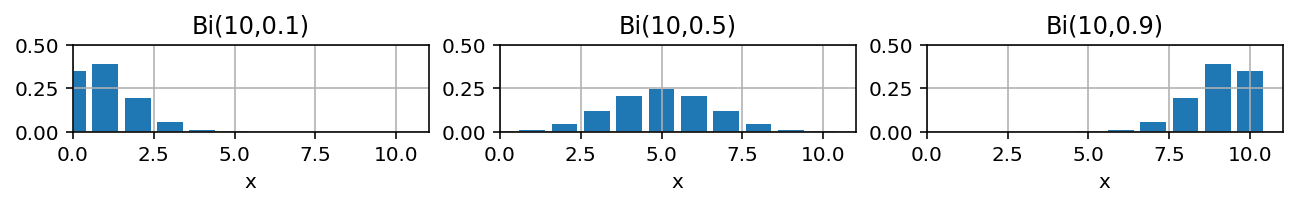

In [8]:
# 作図
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot as plt
def factorial(n):
    if (n==0 or n==1):
        return 1
    else:
        return n*factorial(n-1)

#print(factorial(5))

def Combi(n,x):
    ans = 1
    for i in range(x):
        ans *= (n-i)
    return ans/factorial(x)

# print([Combi(8,i) for i in range(8)])

def BiNom(n,p,x):
    return (Combi(n,x)*p**x*(1-p)**(n-x))

x = range(11)
n=10
prob = [0.1, 0.5, 0.9]
plt.subplots_adjust(left=0.1, bottom=None, right=1.5, top=None, wspace=None, hspace=1.0)
for i in range(1,4):
    plt.subplot(3,3,i)
    p = prob[i-1]
    y = [BiNom(n,p,u) for u in x]
    plt.bar(range(11),y)
    plt.axis([0.0,11.0,0.0,0.5]) 
    plt.grid()
    plt.xlabel('x')
    plt.title('Bi(%d,%.1f)'%(n,p))
plt.show()

二項分布$B(n,p)$の期待値と分散はそれぞれ
$$　E[x] = np,     V[x]=npq　$$
で与えられます。

 <h4>演習問題1-2. </h4> 
 シミュレーションによって二項分布$B(10,0.5)$の期待値が5.0(に近い値）、分散が2.5(に近い値）になることを示せ。なお、二項分布に基づく乱数の生成は以下の例でしめす。

5.0014 2.5341980399999993


5.001108 2.4957627723360005


 <h4>演習問題1-3. </h4> 
6面体のさいころを10回振って、奇数の目が8回現れる確率を求めよ。また、8回以上奇数の目が現れる確率を求めよ。

In [13]:
# 解答


6面体のさいころを10回振って、奇数の目が8回現れる確率=0.0439453125
6面体のさいころを10回振って、奇数の目が8回以上現れる確率=0.0546875


<h3>超幾何分布(hypergeometric distribution)</h3>
赤い玉が$M$個、白い玉が$N-M$個、あわせて2種類の玉が合計$N$個はいっている袋から無作為に玉を$n$個取り出すことを考えよう。このとき玉の取り出し方には<B>復元抽出</B>と呼ばれる方法と<B>非復元抽出</B>と呼ばれる方法があります。復元抽出とは、玉を一旦取り出してから袋に戻して次の玉を選ぶ方法で、非復元抽出とは、玉を袋に戻さずに次の玉を取り出す方法です。<P>
復元抽出の場合、袋の中には常に$N$個の玉が入っているため、毎回同じ状況で玉を取り出すことになります。したがって復元抽出はベルヌーイ試行に対応し、玉を$n$個取り出した時に赤い玉が$x$個あるとする確率変数は二項分布$B(n, M/N)$に従うことになります。
<P>一方、非復元抽出の場合は、玉を取り出すたびに袋の中の玉の個数はどんどん減っていきます。そのため、これまでに取り出された玉の状況によって、袋に残っている玉の割合が変化します。非復元抽出で玉を$n$個取り出した時に含まれる赤い玉の個数$x$が従う確率分布を<B>超幾何分布</B>とよび、$HG(N,M,n)$で表します。

超幾何分布$HG(N,M,n)$の確率質量関数は次式で与えられます:
$$ f(x)=\frac{ {}_MC_x \ {}_{N-M}C_{n-x} }{ {}_NC_n},    \ \ \ \ \ \    x = 0, 1, \ldots, n$$
$x$の定義域は$1,2,\ldots,n$ですが、実際に$x$が取りうる値は以下の範囲に限定されます:
$$ \{ max(0, n-(N-M)\}, \ldots, min(n,M) \} $$
また超幾何分布$HG(N,M,n)$の期待値と分散は以下で与えられます:
$$ E[x] = \frac{nM}{N} \ \ \ \ \ \ \ V[x]=\frac{nM(N-M)(N-n)}{N^2(N-1)} $$

超幾何分布$HG(100,80,10)$の確率質量関数の図:

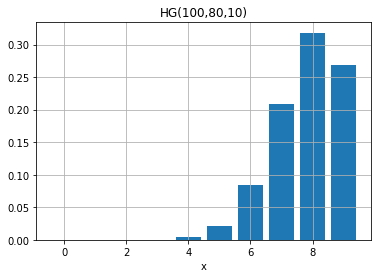

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
#from __future__ import division
def factorial(n):
    if (n==0 or n==1):
        return 1
    else:
        return n*factorial(n-1)

#print(factorial(5))

def Combi(n,x):
    ans = 1
    for i in range(x):
        ans *= (n-i)
    return ans/factorial(x)

# print([Combi(8,i) for i in range(8)])

def HG(N,M,n,x):
    return (Combi(M,x)*Combi(N-M,n-x)/Combi(N,n))

aN=100 
aM=80
n=10

x = range(max([0, n-(aN-aM)]),min([n,aM]))
# print(x)
y = [HG(aN,aM,n,u) for u in x]
# print(Combi(aM,5), Combi(aN,n), Combi(aN-aM,n-5), Combi(aM,5)*Combi(aN-aM,n-5)/Combi(aN,n))
plt.bar(x,y)
plt.grid()
plt.xlabel('x')
plt.title('HG(%d,%d,%d)'%(aN,aM,n))
plt.show()

<h4>演習問題1-4.</h4>
超幾何分布$H(N,M,n)$の確率質量関数が$f(x)=\frac{ {}_MC_x \ {}_{N-M}C_{n-x} }{ {}_NC_n}  $で与えられることを説明せよ。<BR>
ヒント: ${}_MC_x$は、M個の赤玉から$x$個を取り出す組み合わせ。

**解答**


<h3>ポアソン分布(Poisson distribution)</h3>
ポアソン分布は、二項分布$B(n,p)={}_nC_x p^x q^{n-x}$において、$n \rightarrow \infty$, $p \rightarrow 0$としたものと考えられる。

 あるエレベータに乗ろうとする人の１時間あたりの人数や、国道１ｋｍ辺りのコンビニの数がポアソン分布と対応する確率変数です。
ポアソン分布は $Po(\lambda)$で表されます。ここで$\lambda$は平均。 「1時間あたりに来店する客の数の平均が$\lambda$人であるとき、単位時間あたりの来客数$X$が$x$である確率$(X=x)$は次式の確率質量関数で与えられ、$X$は平均$\lambda$のポアソン分布に従います($X \sim Po(\lambda)$)
　$$ P(X=x) =f(x)= \frac{ e^{-\lambda}\lambda^x}{x!} \ \ \ \ \ \ \ \ 　　　(x=0,1,…)$$
 ポアソン分布$Po(\lambda)$の期待値と分散は
 $$ E[x] = \lambda, \ \ \ \ V[x] = \lambda$$
 ポアソン分布の確率質量関数の図:

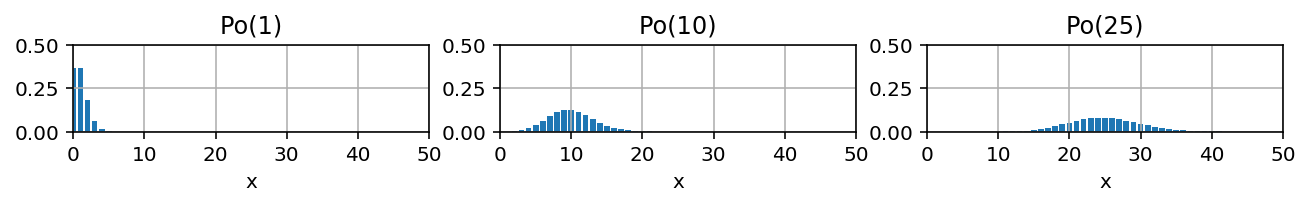

In [15]:
# 作図
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot as plt
import numpy as np
# from __future__ import division

def factorial(n):
    if (n==0 or n==1):
        return 1
    else:
        return n*factorial(n-1)

def Poisson(lam,x):
    return (np.exp(-lam)*lam**x)/factorial(x)

x=range(50)
lst = [1, 10, 25]
plt.subplots_adjust(left=0.1, bottom=None, right=1.5, top=None, wspace=None, hspace=1.0)
for i in range(1,4):
    plt.subplot(3,3,i)
    l = lst[i-1]
    y = [Poisson(l,u) for u in x]
    plt.bar(x,y)
    plt.axis([0.0,50,0.0,0.5]) 
    plt.grid()
    plt.xlabel('x')
    plt.title('Po(%d)'%(l))
plt.show()

<h4>演習問題1-5.</h4>
あるコンビニには10分あたり平均10人の人がくるという。そのコンビニに10分間に15人以上の人がくる確率を求めよ。

In [2]:
# 計算用


問題のコンビニに10分間に15人以上の人がくる確率=   0.917


<HR noshade size=5>
<h2>連続型確率分布</h2>
連続型確率分布は、確率変数が連続値をとる場合の確率分布です。連続型確率変数$X$が確率
$$ P(a \leq X \leq b) = \int^b_a f(x) dx$$
で$a$以上$b$以下の値をとるとき、$f(x)$を<B>確率密度関数(probability density function)</B>と呼びます。
ただし$f(x)$は次の条件を満たさなければなりません:
$$ すべてのxに対し f(x) \geq 0 かつ \int f(x)dx = 1$$

<h4>演習問題2-0. </h4>
連続型確率変数$X$が確率密度関数$f(x)$による確率分布に従うとき、$X$のどの実現値$a$に対しても$P(X=a)=0$となることを示せ。<BR>
参考: このことからわかるように、連続型確率変数は「ある値」をとることに対する確率は0であって、「ある範囲の値」をとることに対して確率が与えられます。(言い換えれば、確率密度関数におけるその範囲の『面積』が確率を表します）

**解答**


<h3>連続一様分布</h3>
ルーレットを回して止まったときの、ルーレットがどのくらい回転したかという分布(ただし0から2πまでの範囲とする)は連続一様分布とみなせる。
連続一様分布(uniform distribution)は $U(a,b)$で表され、確率密度関数$f(x)$が
$$ f(x) = \left\{ \begin{array}{ll} \frac{1}{b-a} &  a < x < b \ の場合\\
                               0              & それ以外 \end{array} \right.$$
で与えられる。連続一様分布$U(1,2) (つまりa=1, b=2)$の確率密度関数$f(x)$は下図: 

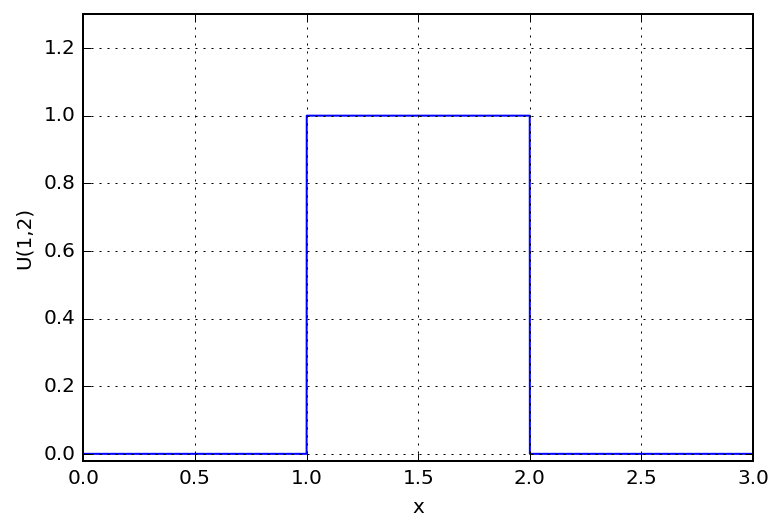

In [167]:
%matplotlib inline
import numpy as np

def U(x, a=1.0, b=2.0):  # uniform distribution
   if (a < x  < b):
      return 1.0/(b-a)
   return 0
        
# ベクトルxを [0.0, ..., 3.0] の区間で作成
x = np.linspace(0.0, 3.0, 10000)

# f(x)の結果を得る
y = [U(z) for z in x]

# グラフに表示
plt.plot(x,y)
plt.axis([0.0,3.0,-0.02,1.3])  # 見栄えのため描画範囲を指定する
plt.xlabel('x')
plt.ylabel('U(1,2)')
plt.grid()
plt.show()

<h4>演習問題2-1.</h4>
連続一様分布$U(a,b)$の期待値と分散がそれぞれ以下で与えられることを示せ。
$$E[x] = \frac{a+b}{2} \ \ \ \ V[x]=\frac{(b-a)^2}{12}$$

**解答**


<h3>正規分布</h3><IMG  class="fig" SRC="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/GaussianCurve.png"  width="40%" hspace="1" align="right" />
 確率統計においてもっとも重要な確率分布である。一般にかなりの人数を対象とした試験の成績をx軸、その得点の人数をy軸に取ると、この分布に近いグラフが得られる。それだけではなく、ロボットの位置推定（カルマンフィルタなど）にも用いられている（ただし、この場合は多変数の正規分布になる）。また、正規分布に従うとは限らない確率変数でも、その実現値をグループごとの平均をとれば、そのグループの個数が多ければ多いほどその平均値は正規分布する(中心極限定理)。

* 正規分布(normal distribution): 密度関数$f(x)$が以下の式で与えられる分布を、 平均$\mu$、分散$\sigma^2$の正規分布（またはガウス分布)といい、$N (\mu,\sigma^2)$で表す: 
 $$ f(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})  \ \ \ \ (-\infty < x < \infty)$$
特に$\mu=0, \sigma=1$の正規分布 $N(0, 1)$ を<B>標準正規分布</B>という<P>
  参考: 区間$[-\infty, \infty]$における$f(x)$の積分の値は1、
区間$[\mu - \sigma, \mu+\sigma]$における$f(x)$の積分の値は約0.683、
区間$[\mu - 2\sigma, \mu+2\sigma]$における$f(x)$の積分の値は約0.954、
区間$[\mu - 3\sigma, \mu+3\sigma]$における$f(x)$の積分の値は約0.997

* 正規分布の性質：　$X \sim N(\mu, \sigma^2)$のとき、$E(X) = \mu, V(X) = \sigma^2$
* <B>中心極限定理</B>: $X_1, \ldots, X_n$がi.i.d.で、平均がいずれも$\mu$、分散が$\sigma^2$の確率分布に従うとき(注意: 確率変数$X_i$は必ずしも正規分布に従う必要はない)、データ数が増えてくるとその算術平均$\bar{X}=\frac{1}{n}\sum^n_{i=1}X_i$の分布は平均$\mu$、分散$\frac{\sigma^2}{n}$の正規分布で近似される。
    
$$ \frac{\bar{X}-E(\bar{X})}{\sqrt{V(X)}} = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \longrightarrow N(0,1^2) \ \ \  (n\rightarrow \infty)$$

(<font color="red">注</font>: 中心極限定理と大数の法則を混同しないように。大数の法則は一個の標本群を対象としている（標本サイズが大きくなるとその平均がもとの確率分布の期待値に収束する)のに対し、中心極限定理は、多数の標本群を対象とし、標本群が多ければ標本群の平均$\bar{x}$が正規分布する、ということを言っている。)

<UL>
  <LI>$ X \sim N(\mu, \sigma^2)$、$Y=aX+b$(ここで$a, b$は定数)とすると、 
     $$Y \sim N(a\mu+b, a^2\sigma^2)$$
  <LI>$X_1 \sim N(\mu_1, \sigma_1^2)$、 $X_2 \sim N(\mu_2,\sigma_2^2)$、かつ$X_1$と$X_2$が独立のとき、次が成り立つ:
$$a_1 X_1 + a_2 X_2 \sim  N((a_1 \mu_1+a_2 \mu_2), ( (a_1 \sigma_1)^2 + (a_2\sigma_2)^2 ))$$

このように正規分布に従う確率変数の線形和もまた正規分布する、という性質がある(とても重要)。
<P>
参考：正規分布の密度関数の描画:

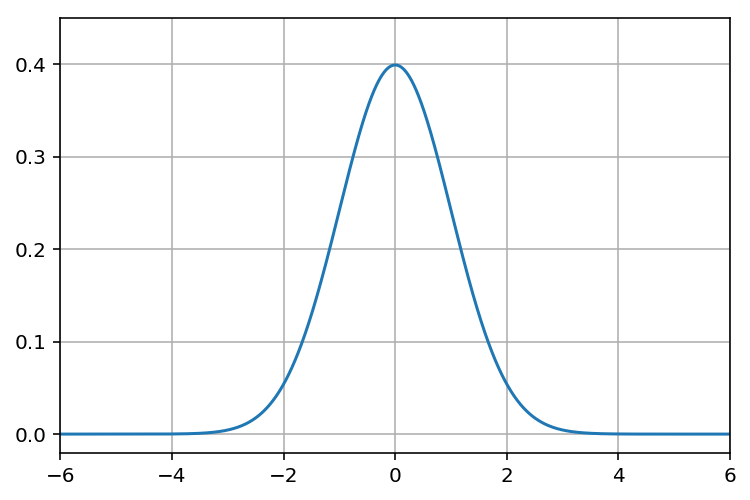

In [16]:
%matplotlib inline
import numpy as np
# from __future__ import division
# Gaussian : N(0,1)
def Gaussian (x):
    return (np.exp(-x**2/2)) / np.sqrt(2*np.pi) 

# ベクトルxを [-6.0, ..., 6.0] の区間で作成
x = np.linspace(-6.0, 6.0, 10000)

# f(x)の結果を得る
y = [Gaussian(i) for i in x]

# グラフに表示
plt.plot(x,y)
plt.axis([-6,6,-0.02,0.45])  # 描画範囲を指定する
plt.grid()


<h4>演習問題2-2. </h4>(問題訂正)
中心極限定理を、一様乱数を用いて視覚化してみよう。連続一様分布の関数randomモジュールのrandom関数は$[0,1)$の一様乱数を生じる。この一様分布に基づくi.i.d.なn個の確率変数の期待値と分散を書け。次に$n=100, 10000, 1000000$と変えてみて、それぞれの個数の乱数算術平均の平均と分散を求めよ。
<!----
 $\int^1_0 (x-0.5)^2 dx = 1/3 -1/2 + 1/4 = 1/12 = 0.0833
--->

In [10]:
# 解答欄
import numpy as np
import numpy.random as random

print("理論的にn個の確率変数の期待値は一様乱数の期待値1/2, 分散は1/12をnで割った値になる")

for n in [100,1000, 10000, 100000, 1000000]:
   t = np.array([random.random() for _ in range(n)])
   print("[%d]: mean=%f, var=%f" % (n, t.mean(), t.var()))


理論的にn個の確率変数の期待値は一様乱数の期待値1/2, 分散は1/12をnで割った値になる
[100]: mean=0.511843, var=0.076138
[1000]: mean=0.509795, var=0.078891
[10000]: mean=0.502994, var=0.084001
[100000]: mean=0.502026, var=0.083409
[1000000]: mean=0.500474, var=0.083407


In [5]:
1.0/12

0.08333333333333333

<h4>演習問題2-3</H4>
ここにロボットがある。このロボットは、1.0mの直進前進命令によって移動させると、 元の位置との相対距離は$N(1.0, 0.01)$に従うことがわかっている。 ここで、そのロボットは初め原点($x=0$)におり、そこから1.0mの直進前進命令を2回出した。移動後のロボットの位置の確率分布はどのように表されるか。また、原点から$2.0 \pm 0.1\sqrt{2}$ mの範囲にいる確率を求めよ。

**解答**



<h4>演習問題2-4</h4>(やらなくてもよいが、チャレンジした方にはポイント?)

正規分布に基づく乱数発生の関数がrandomモジュールのnormal関数であることを用い、前問の 「原点から$2.0 \pm 0.1\sqrt{2}$ mの範囲にいる確率」をシミュレーションにより確かめてみよ。

In [12]:
# 解答欄


<h3>多変数の正規分布</h3>
下に示される多変数の正規分布(ガウス分布)も重要である($\mathbf{x}$と$\mathbf{\mu}$は$d$次元ベクトル、$\mathbf{\Sigma}$は$d \times d$の行列(共分散行列), $d$は正整数)。
$$ p(\mathbf{x}) \sim N(\mathbf{\mu}, \Sigma):\\
   p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(\mathbf{x-\mu})^T\Sigma^{-1}(\mathbf{x-\mu}) )$$

そして、次のような性質を持つ:
<UL class="rule">
<LI>$n$次元ベクトル$\mathbf{X}$が $N(\mathbf{\mu},\mathbf{\Sigma})$
に従うとする。また、
$\mathbf{A}$が$m \times n$の行列、$\mathbf{b}$ が$m$次元ベクトルとすると、
$\mathbf{Y}= \mathbf{AX} + \mathbf{b}$ は
$N(\mathbf{A\mu} +  \mathbf{b} , \mathbf{A\Sigma A^T})$ に従う
(ここで $\mathbf{A^T}$は$\mathbf{A}$ の転置行列)
</UL>
その応用としては、ロボットの位置推定がある。ロボットの位置のパラメタとしては、(2次元平面を移動するとして)$x$座標、$y$座標、そしてロボットの向き$\theta$という少なくとも3つを考える必要がある。そしてロボットに例えば$x$軸方向に1m移動させようとしても、正確に1m移動することは不可能であり、1m移動した後の位置はその地点を平均とした正規分布($x, y, \theta$それぞれ)に従うと考えられる。このような移動を繰り返していくと、位置はどんどん不確定になるが、そうであっても、ロボットの位置は正規分布で表すことができる。ここでセンサー(例えばGPS)によりロボットの位置についての何らかの情報が得られるとしよう。センサーで得られる情報はやはり誤差を含んだものである（車のナビを使っていて、道路を走っていても、ナビでは道路を外れたところを表示していることがしばしばある）。このセンサー情報も正規分布で表すことができる。<A HREF="http://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%AB%E3%83%9E%E3%83%B3%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%BC" target="_blank">カルマンフィルタ</A>はロボットの移動の情報とセンサーの情報により、確率に基づいて、ロボットの位置推定を行うための優れた手法の一つである。

<h3>参考:共分散行列について</h3>
多変数の正規分布において、さりげなく<B>共分散行列</B>を出してしまいましたが、ここではそれについて少し詳しく見ていきましょう。
<P>
ここでは2つの確率変数$X, Y$に対する<B>共分散(covariance)</B>$Cov[X,Y]$を導入します。この式は分散と似ています。確率変数$X$と$Y$の期待値をそれぞれ$\mu, \nu$とすると、$X$と$Y$の共分散を次式で定義する:
$$ Cov[X,Y] \equiv E[(X - \mu)(Y - \nu)] $$
このことから、次が成り立つ:
$$ \begin{array}{l} Cov[X,Y] = Cov[Y,X] \\
                    Cov[X,X] = V[X] \\
                    Cov[X+a, Y+b] = Cov[X,Y]  \ \ \  (a, bは定数)\\
                    Cov[aX, bY] = ab Cov[X,Y] \ \ \  (a, bは定数)\\
                    \end{array} $$
共分散で分かることは分散とはちょっと異なります。
<UL>
    <LI>共分散が正 → 片方が大きいと、もう一方も大きい傾向がある（正の相関)
    <LI>共分散が0→ 片方が大きいとしても、もう一方が大きいとか小さいとかの傾向はない（無相関）
    <LI>共分散が負 → 片方が大きいと、もう一方は小さい傾向がある(負の相関）
</UL>

いま、$n$個の確率変数$X_1,\ldots,X_n$があるとします。それぞれの共分散を計算して下のように作成した行列を<B>共分散行列</B>( <B>分散共分散行列</B>とも）いいます。


$$
\left( \begin{array}{cccc}
  Cov[X_1, X_1] &  Cov[X_1, X_2]  &  \ldots  &   Cov[X_1, X_n]  \\
  Cov[X_2, X_1] &   Cov[X_2, X_2]  &  \ldots &   Cov[X_2, X_n]  \\
  \vdots  & \vdots  &  \ddots &   \vdots  \\
 Cov[X_n, X_1]  &   Cov[X_n, X_2]  &  \ldots &   Cov[X_n, X_n]  \\
\end{array} \right)
$$

<h4>演習問題2-5.</h4>
共分散行列が<B>対称行列</B>であり、対角成分はいずれも負ではないことを示せ。(注: 行列$M$が対称行列とは、$M^T = M$であることを意味する)

解答欄



ここで$n$個の確率変数$X_1,\ldots,X_n$をまとめてベクトル$\mathbf{X}$と表します。つまり、$\mathbf{X}=(X_1,X_2,\ldots,X_n)^T$です。すると、共分散行列は次のように書けます(記号が$V$に変わりました）:
$$ V[\mathbf{X}] = E[(\mathbf{X - \mu})(\mathbf{X}-\mu)^T] \ \ \ \  (ただし\mathbf{\mu}=E[\mathbf{X}])$$

<h4>演習問題2-6.</h4>
$n=3$として$ V[\mathbf{X}] = E[(\mathbf{X - \mu})(\mathbf{X}-\mu)^T] \ \ \ \  (ただし\mathbf{\mu}=E[\mathbf{X}])$ が成り立つことを示しなさい。<BR>
なお、以下が成り立つ:
$$E \left[ \left( \begin{array}{lll}a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}
   \end{array} \right) \right] = \left( \begin{array}{lll} E[a_{11}] & E[a_{12}] & E[a_{13}] \\ E[a_{21}] & E[a_{22}] & E[a_{23}] \\ E[a_{31}] & E[a_{32}] & E[a_{33}]
   \end{array} \right) $$
またこの場合、$V[\mathbf{X}]$を書き下すと次の様にかける:
$$ V[\mathbf{X}] = \left( \begin{array}{lll} V[X_1] & Cov[X_1,X_2] &Cov[X_1,X_3]\\
           Cov[X_2,X_1]  &  V[X_2]  &Cov[X_2,X_3]\\ Cov[X_3,X_1] &Cov[X_3,X_2]  & V[X_3]
   \end{array} \right) $$

解答欄


<h4>演習問題2-7.</h4>
2個の確率変数$X_1, X_2$だけを考える。これらをまとめたベクトル$\mathbf{x}$に対する正規分布の確率密度関数は
次で与えられるのであった:$$ 
   p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(\mathbf{x-\mu})^T\Sigma^{-1}(\mathbf{x-\mu}) )$$
 ここで$X_1, X_2$が無相関(つまり$Cov[X_1,X_2]=0$)とし、それぞれの期待値を$\mu_1, \mu_2$、分散を$\sigma_1^2, \sigma_2^2$とすると、この2つの確率変数に対する正規分布の確率密度関数が以下で与えられることを示せ:
  $$ p(\mathbf{x}) = \frac{1}{\sqrt{2\pi \sigma_1^2}} \exp(-\frac{(X_1-\mu_1)^2}{2\sigma_1^2})  \frac{1}{\sqrt{2\pi \sigma_2^2}}\exp(-\frac{(X_2-\mu_2)^2}{2\sigma_2^2})$$
 

解答欄


<h3>指数分布(Exponential distribution)</h3>
<B>指数分布</B>とは、単位時間に平均$\lambda$回起こる事象が初めて起こるまでの時間$x$が従う確率分布です。
指数分布は $Exp(\lambda)$で表され、その確率密度関数$f(x)$は次式で与えられる：
$$ f(x) = \left\{ \begin{array}{ll} \lambda e^{-\lambda x} & (0 \leq x (\lambda > 0) \\
      0 & x < 0 \end{array} \right. $$
いくつかの$\lambda$に対し$f(x)$は下図のようになる。 

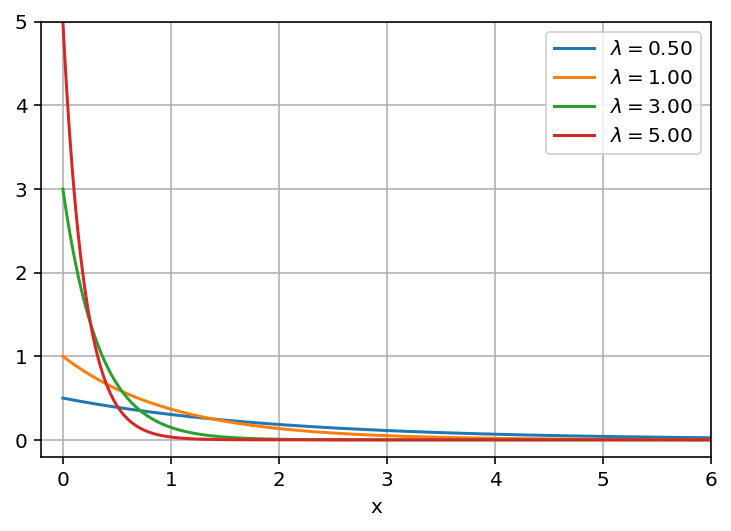

In [17]:
#
%matplotlib inline
import numpy as np
# from __future__ import division
# Exponential
def Exp (lam,x):
    if (x >= 0) and (lam > 0):
        return lam * np.exp(-lam*x)
    return 0

# ベクトルxを [0, ..., 6.0] の区間で作成
x = np.linspace(0, 6.0, 1000)
lst = [0.5, 1, 3, 5]

for i in range(4):
    l = lst[i]
    # f(x)の結果を得る
    y = [Exp(l,i) for i in x]
    plt.plot(x,y,label='$\lambda=%.2f$'%(l))
    plt.legend()
plt.axis([-0.2,6.0,-0.2,5.0]) 
plt.grid()
plt.xlabel('x')

plt.show()


<h3>統計量の分布</h3>
統計的仮説検定でよく用いられる確率分布をいくつか紹介します。いずれも連続型です。

<h4>カイ二乗 (カイ自乗、$\chi^2$)分布 (chi-square distribution)</h4>
ポアソン分布は単位時間中に平均$\lambda$回起こる事象が単位時間中に$x$回起こる確率を表す離散型確率分布でした。それに対し、「単位時間中に平均$\lambda$回起こる事象が$\alpha$回起こるまでの時間」$x$が従う確率分布が<B>ガンマ分布(gamma distribution)</B>と呼ばれるものです。<BR>
  ガンマ分布$Ga(\alpha, \lambda)$の確率密度関数は次式で与えられます:
  $$ f(x)=\frac{\lambda^\alpha}{\Gamma(\alpha)} x^{\alpha-1}e^{-\lambda x},\ \ \ (x \geq 0)$$
ここで$\Gamma(\alpha)$はガンマ関数(gamma function)で、その定義は以下:
$$ \Gamma(\alpha) = \int^{-\infty}_0 x^{\alpha-1}e^{-x} dx \ \ \ \ \ (\alpha > 0) $$


ガンマ関数についての知識: $\Gamma(\alpha+1)=\alpha \Gamma(\alpha)$, $\Gamma(1)=1$, $\Gamma(\frac{1}{2}) = \pi$ --- $\alpha$が自然数ならば$\Gamma(\alpha)=\alpha !$(階乗)に等しい

整数$n$に対し$\alpha=n/2, \lambda=1/2$とおいたガンマ分布$Ga(\alpha,\lambda)$を **自由度$n$の$\chi^2$(カイ二乗)分布** と呼び、$\chi^2(n)$で表します。これは標準正規分布$N(0,1^2)$に従う互いに独立な$n$個の確率変数$X_1, \ldots, X_n$の二乗和
$X = \sum^n_{i=1} X_i^2$が従う確率分布で、その確率密度関数は次式で与えられます:
$$ f(x) = \frac{x^{\frac{n}{2}-1}}{2^{\frac{n}{2}}\Gamma(\frac{n}{2})}e^{-\frac{x}{2}}$$

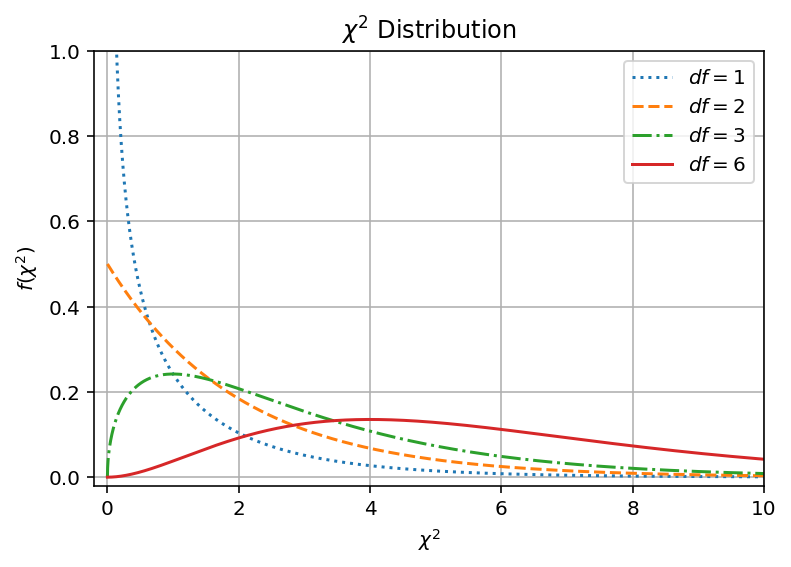

In [18]:
# 作図
%matplotlib inline
# from __future__ import division
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
x = np.linspace(0, 10, 10000)
linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 2, 3, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls, label=r'$df=%i$' % df)

plt.xlabel('$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')
plt.axis([-0.2,10,-0.02,1.0]) 
plt.legend()
plt.grid()

<h3>t分布 (t-distribution)</h3>
標準正規分布$N(0,1^2)$に従う確率変数$X$と、自由度$d$のカイ二乗分布に従う確率変数$Y$との比
$$ T = \frac{X}{\sqrt{Y/d}} $$
が従う確率分布を(スチューデントの)$t$分布とよび$t(d)$で表します。$t$分布の確率密度関数は次式で与えられます:
$$ f(x) = \frac{1}{\sqrt{d\pi}} \frac{\Gamma(\frac{d+1}{2})}{\Gamma( \frac{d}{2} )} 
 (1+\frac{x^2}{d})^{-\frac{d+1}{2}} \ \ \ \ \ (-\infty < x < \infty)$$
なお、次式で定義されるベータ関数$B(a,b)$を用いると　$$ B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)} $$
$t$分布の確率密度関数は以下のようにもかけます:
$$ f(x) = \frac{1}{\sqrt{d\pi}B(\frac{d}{2},\frac{1}{2})} 
 (1+\frac{x^2}{d})^{-\frac{d+1}{2}} \ \ \ \ \ (-\infty < x < \infty)$$

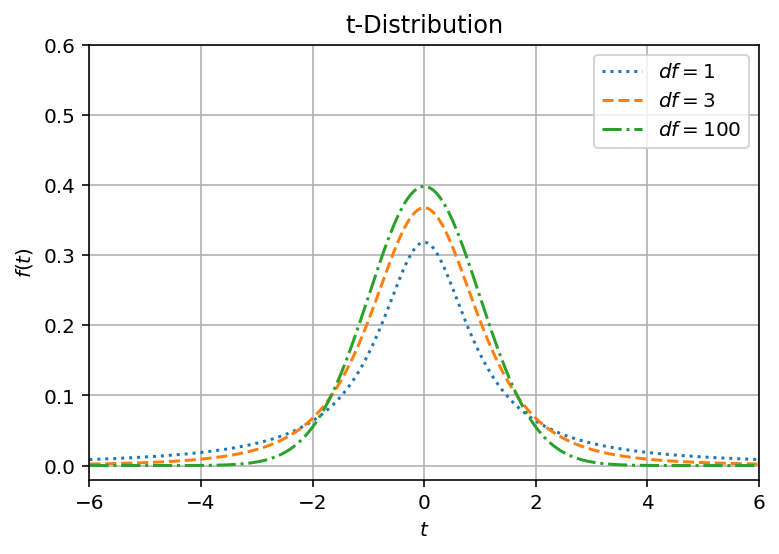

In [19]:
# 作図
%matplotlib inline
# from __future__ import division
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
x = np.linspace(-6, 6, 10000)
linestyles = [':', '--', '-.']
deg_of_freedom = [1,3,100]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.t.pdf(x, df), linestyle=ls, label=r'$df=%i$' % df)

plt.xlabel('$t$')
plt.ylabel(r'$f(t)$')
plt.title(r't-Distribution')
plt.axis([-6,6,-0.02,0.6]) 
plt.legend()
plt.grid()

<h3>F 分布(F-distribution)</h3>
自由度が$m$と$n$のカイ二乗分布に従う２つの独立な確率変数$X$と$Y$に対し、その比
$$ x = \frac{X/m}{Y/n}$$
が従う確率分布をF分布とよび、$F(m,n)$で表します。自然数$m,n$に対するF分布$F(m,n)$の確率密度関数は次式で与えられます
$$ f(x) = \frac{1}{B(\frac{m}{2}, \frac{n}{2})} (\frac{mx}{mx+n})^{m/2} (\frac{n}{mx+n})^{n/2}x^{-1} \ \ \  (x \geq 0)$$

In [7]:
from scipy import stats
?stats.f.pdf

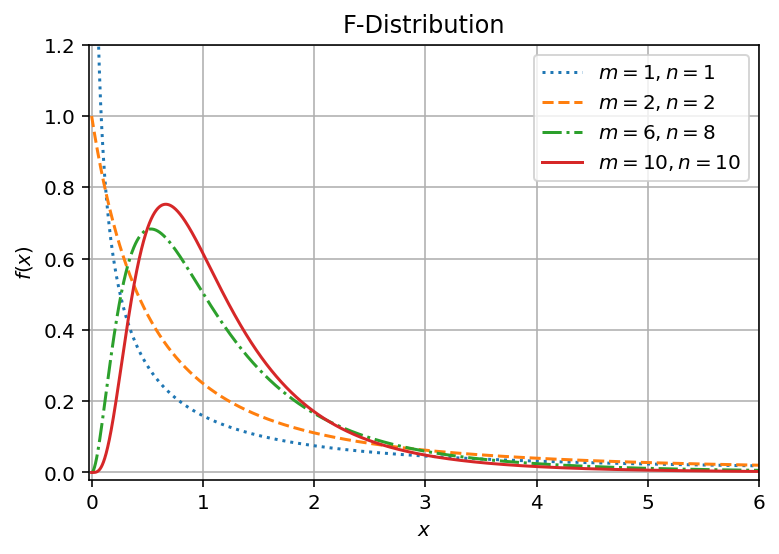

In [21]:
# 作図
%matplotlib inline
# from __future__ import division
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
x = np.linspace(0.0001, 6, 10000)
linestyles = [':', '--', '-.','-']
deg_of_freedom = [(1,1),(2,2),(6,8),(10,10)]
for (m,n), ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.f.pdf(x, m,n), linestyle=ls, label=r'$m=%i, n=%i$' % (m,n))

plt.xlabel('$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'F-Distribution')
plt.axis([-0.02,6,-0.02,1.2]) 
plt.legend()
plt.grid()

## 中心極限定理、正規分布、$\chi^2$分布、$t$分布、$F$分布のまとめ

1. 中心極限定理
    * 互いに独立な$n$個の確率変数$X_1, X_2, \ldots,X_n$が**平均$\mu$, 分散$\sigma^2$の同一の確率分布に従う**とき、
$\bar{X}=\frac{1}{n}(X_1+X_2+\cdots+X_n)$(つまり$\bar{X}$はその平均)は$n\rightarrow \infty$のとき
**正規分布$N(\mu, \sigma^2/n)$に従う**。
    * そして$\bar{X}$を**標準化**した確率変数$Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$は、$n \rightarrow \infty$のとき**標準正規分布$N(0,1)$に従う**

2. 正規分布$N(\mu, \sigma^2)$
    * 平均値$\mu=0$、分散$\sigma^2=1$の正規分布を**標準正規分布**と呼ぶ。これは、正規分布に従う確率変数$X$を**標準化: $Z=\frac{X-\mu}{\sigma}$** した変数が従う分布である。
    * 互いに独立な$n$個の確率変数$X_1, X_2, \ldots,X_n$がすべて同一の**正規分布$N(\mu,\sigma^2)$に従う**とき、
$\bar{X}=\frac{1}{n}(X_1+X_2+\cdots+X_n)$(つまり$\bar{X}$はその平均)は**正規分布$N(\mu, \sigma^2/n)$に従う**。
(注：中心極限定理と違い、$n \rightarrow \infty$が不要であることに注意）

3. $\chi^2$分布
    * 互いに独立な$n$個の確率変数$X_1, X_2, \ldots,X_n$が**標準正規分布$N(0,1)$に従う**とき、その2乗和$Z=X_1^2+\cdots+X_n^2$は、**自由度$n$の$\chi^2$分布に従う** 

4. $t$分布
    * 2つの独立な確率変数$X$と$Y$があり、$X$は**標準正規分布$N(0,1)$**に、$Y$は**自由度$n$の$\chi^2$分布**に従うとき、$Z=\frac{X}{\sqrt{Y/n}}$とすると、$Z$は**自由度$n$の$t$分布に従う**
    
5. $F$分布
     * 2つの独立な確率変数$X$と$Y$があり、$X$は **自由度$m$の** 、$Y$は **自由度$n$の$\chi^2$分布** に従うとき、$Z=\frac{X/m}{Y/n}$とすると、$Z$ は **自由度$(m,n)$の$F$分布に従う**